In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, time
sys.path.insert(1, '../discrete_mixflows/')
from discrete_mixflows import *
from gibbs import *
from concrete import *

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.figsize"]=15,7.5
plt.rcParams.update({'font.size': 24})

In [2]:
########################
########################
# target specification #
########################
########################
np.random.seed(2023)
K1=4
K2=5
prbs=np.random.rand(K1,K2)
prbs=prbs/np.sum(prbs)
def lp(x,axis=None):
    # compute the univariate log joint and conditional target pmfs
    #
    # inputs:
    #    x    : (2,d) array with state values
    #    axis : int, full conditional to calculate; returns joint if None
    # outputs:
    #   ext_lprb : if axis is None, (d,) array with log joint; else, (d,K_{axis+1}) array with d conditionals 
    
    ext_lprb=np.log(np.moveaxis(np.repeat(prbs[:,:,np.newaxis],x.shape[1],axis=-1),2,0)) # stack d copies of logp vertically
    if axis==None: return np.squeeze(ext_lprb[np.arange(0,x.shape[1]),x[0,:],x[1,:]]) # for each d, return lp(x)
    if axis==0: return ext_lprb[np.arange(0,x.shape[1]),:,x[1,:]]
    if axis==1: return ext_lprb[np.arange(0,x.shape[1]),x[0,:],:]
    raise Exception("Axis out of bounds - there aren't that many variables")

In [6]:
temp=0.5
depth=10
layer=128
maxiters=1001
tmp_flow,tmp_loss=trainRealNVP(
                temp=temp,depth=depth,lprbs=np.log(prbs).flatten(),layers=layer,max_iters=maxiters,lr=1e-3,seed=2023
            )

iter 0: loss = 825.137
iter 100: loss = 51.152
iter 200: loss = 46.290
iter 300: loss = 44.490
iter 400: loss = 43.514
iter 500: loss = 42.745
iter 600: loss = 42.220
iter 700: loss = 41.713
iter 800: loss = 40.980
iter 900: loss = 40.966
iter 1000: loss = 40.102


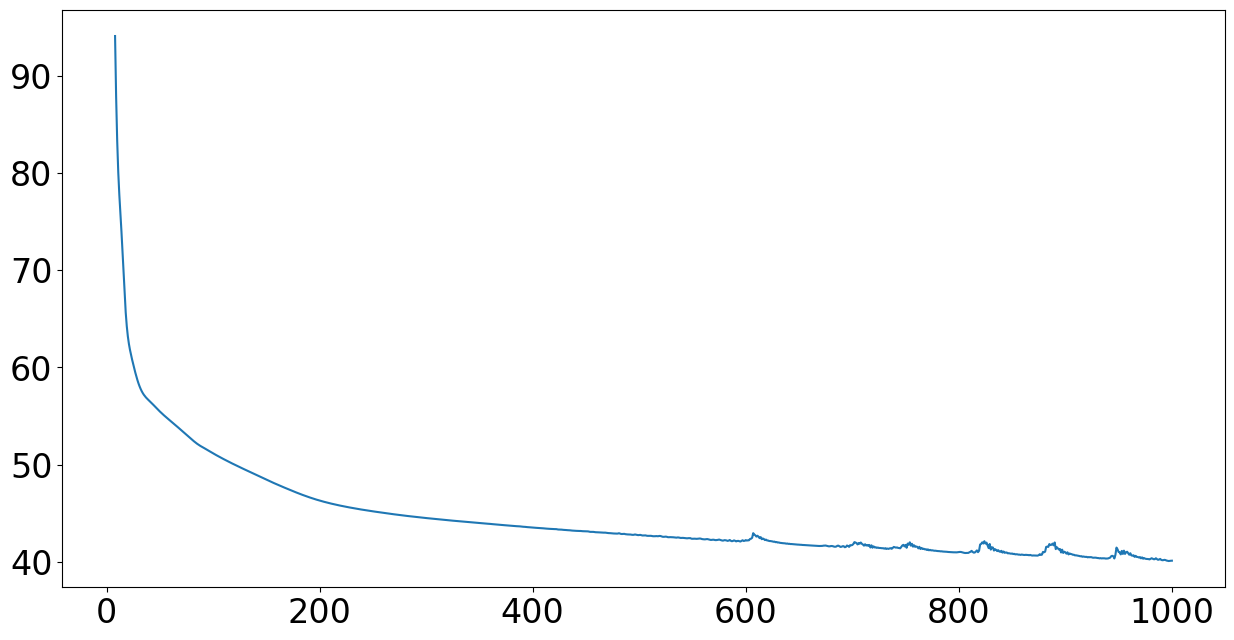

In [8]:
threshold=100
plt.plot(np.arange(0,maxiters)[tmp_loss<threshold],tmp_loss[tmp_loss<threshold])

In [24]:
sample_size=1000
tmp_sample=tmp_flow.sample(sample_size)
tmp_sample=np.exp(np.squeeze(tmp_sample.detach().numpy())) # expConcrete->Concrete
tmp_sample=tmp_sample/np.sum(tmp_sample,axis=-1)[:,np.newaxis] # normalize probs
tmp_sample=np.argmax(tmp_sample,axis=-1) # rounding Concrete
tmp_sample=idx_unflatten(tmp_sample,K2)

In [26]:
tmp_density=plt.hist2d(tmp_sample[0,:],tmp_sample[1,:],density=True,
                         bins=[np.arange(0,K1+1),np.arange(0,K2+1)])[0]
plt.clf()

<Figure size 1500x750 with 0 Axes>

In [27]:
print(prbs)
print(tmp_density)

[[0.04394993 0.12153859 0.08026644 0.01727979 0.01929243]
 [0.06386561 0.00301514 0.09926967 0.07157647 0.07438117]
 [0.06229286 0.06843638 0.05384315 0.02063433 0.04925781]
 [0.02212277 0.04612981 0.0246133  0.05336854 0.00486582]]
[[0.032 0.117 0.018 0.009 0.012]
 [0.034 0.006 0.056 0.037 0.072]
 [0.121 0.12  0.061 0.03  0.019]
 [0.069 0.108 0.026 0.045 0.008]]
